**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Oluwatobiloba Ogunbi <br/>
Student Number: 300202843

Name: Vanisha Bagga <br/>
Student Number: 300191679

- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 

We divided steps 1-6 between us since they were similar processes to Assignment 1, which we both completed. After thoroughly checking each other's work to ensure we understood the data and that the code flowed smoothly, we collaborated on steps 7-10 together. We discussed the outcomes of the code together to analyze the results in depth and see both of our perspectives. We both typed up our joint conclusions to the code based on the analysis ensuring we both able to achieve the learning outcomes.

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *

## I just copied the ones from a1 for now

In [30]:
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"
dataframe = pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

First few rows in dataframe:

In [31]:
print(dataframe.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Information on dataset:

In [32]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


Statistics:

In [33]:
print(dataframe.describe(include='all'))

        gender            age  hypertension  heart_disease smoking_history  \
count   100000  100000.000000  100000.00000  100000.000000          100000   
unique       3            NaN           NaN            NaN               6   
top     Female            NaN           NaN            NaN         No Info   
freq     58552            NaN           NaN            NaN           35816   
mean       NaN      41.885856       0.07485       0.039420             NaN   
std        NaN      22.516840       0.26315       0.194593             NaN   
min        NaN       0.080000       0.00000       0.000000             NaN   
25%        NaN      24.000000       0.00000       0.000000             NaN   
50%        NaN      43.000000       0.00000       0.000000             NaN   
75%        NaN      60.000000       0.00000       0.000000             NaN   
max        NaN      80.000000       1.00000       1.000000             NaN   

                  bmi    HbA1c_level  blood_glucose_level      

List of features (columns) and their data types:

In [34]:
print(dataframe.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


Target variable:

In [35]:
target_variable = dataframe.columns[-1]
print(f"\nThe target variable is: {target_variable}")


The target variable is: diabetes


Summary of info found:

- **Total Entries:** 100,000
- **Features (Columns):**
  1. **gender**: Categorical (object) - Gender of the individual (Female, Male)
  2. **age**: Continuous (float64) - Age of the individual in years
  3. **hypertension**: Binary (int64) - Yes (1) or No (0) for hypertension
  4. **heart_disease**: Binary (int64) - Yes (1) or No (0) for heart disease
  5. **smoking_history**: Categorical (object) - Smoking habits of the individual (never, No Info, current, former, ever, not current)
  6. **bmi**: Continuous (float64) - Body Mass Index of the individual
  7. **HbA1c_level**: Continuous (float64) - Glycated hemoglobin level
  8. **blood_glucose_level**: Continuous (int64) - Blood glucose level

- **Target Variable:**
  - **diabetes**: Yes (1) or No (0) for diabetes. 

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

In [36]:
# separate the features into numerical and categorical columns
numeric_columns = dataframe.select_dtypes(include='number').columns.drop(target_variable)
categorical_columns = dataframe.select_dtypes(exclude='number').columns


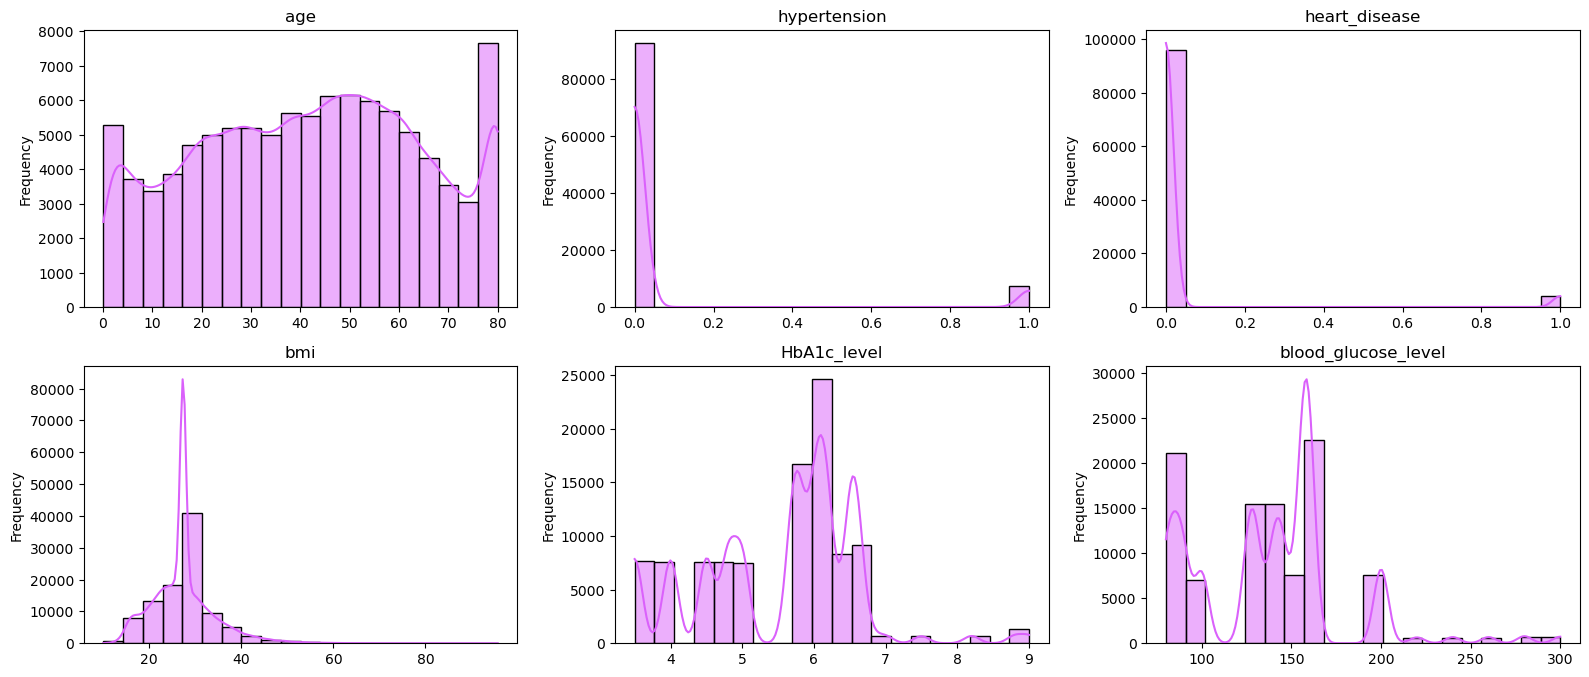

In [37]:
plt.figure(figsize=(16, 10))

# plot histograms for numerical features (columns)
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3 plots in each row
    sns.histplot(dataframe[column], bins=20, kde=True, color='#DA61FB')
    plt.title(column)
    plt.xlabel(None)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Age**:
  - Distribution is almost uniform with a little bit of a left skew
    - Balanced representation of younger and older individuals
  - Most are around 80, least are around 10

- **Hypertension**:  
  - Less common feature in data
  - Most are 0
  - Small peak at 1.0 which is outlier

- **Heart Disease**:  
  - Similar results to Hypertension
    - Also less common feature in data  

- **BMI**:  
  - Right-skewed distribution
  - Peak at 20-25 
    - Most individuals are in normal BMI range 

- **HbAlc Level**:  
  - Multiple peaks
  - Most are between 6 and 7, which is high level
  - Some outliers with higher levels

- **Blood Glucose Level**:  
  - Right-skewed distribution
  - Peak at around 150 
  - Some outliers with higher levels

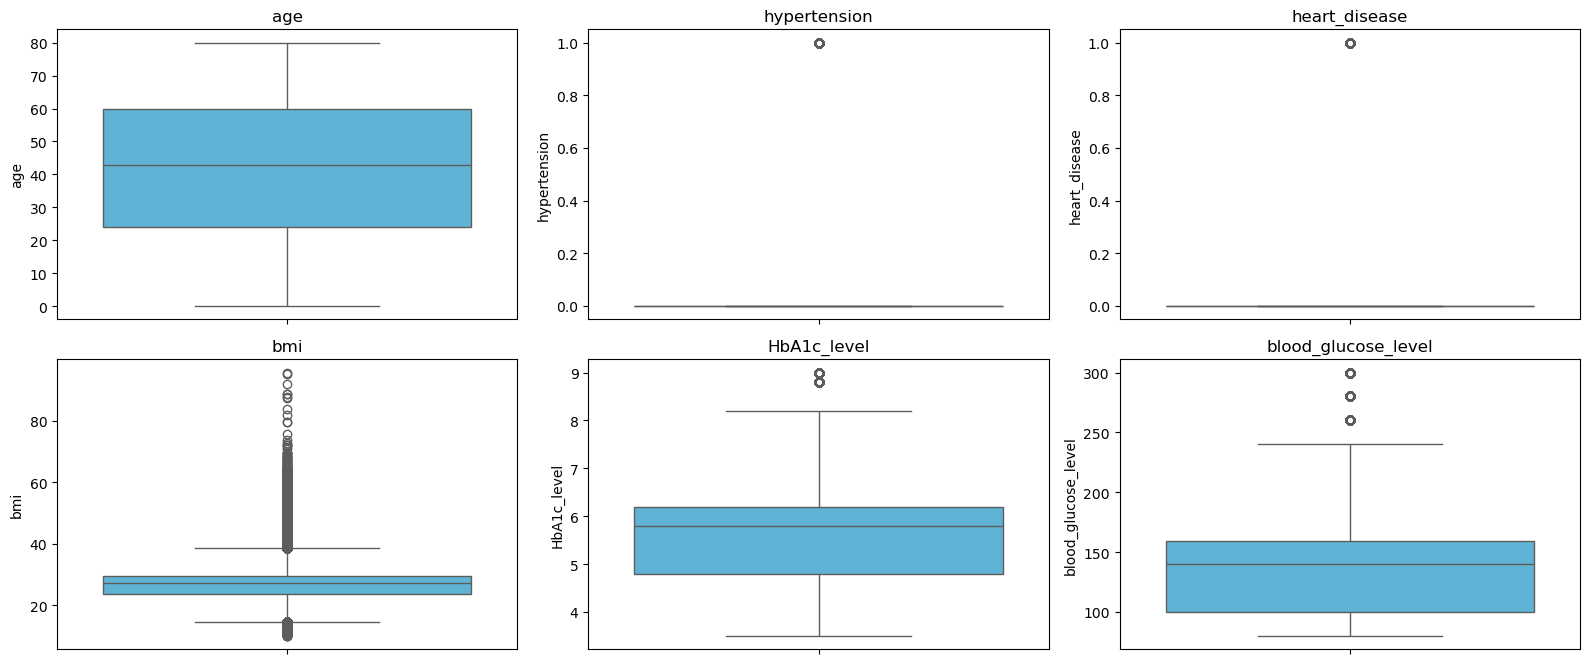

In [38]:
plt.figure(figsize=(16, 10))

# plot boxplots for numerical features (columns)
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3 plots in each row
    sns.boxplot(y=dataframe[column], color='#4BBCEA')
    plt.title(column)

plt.tight_layout()
plt.show()

- **Age**:
  - Median ~ 45 years
  - No significant outliers

- **Hypertension**:  
  - Median at 0 (most have no hypertension)
  - Outlier at 1

- **Heart Disease**:  
  - Median at 0 (most have no heart disease)
  - Outlier at 1

- **BMI**:  
  - Median ~ 24
  - Many high outliers that are 40 and higher

- **HbAlc Level**:  
  - Median ~ 6
  - Some outliers at 8-9 which is high levels

- **Blood Glucose Level**:  
  - Median ~ 140
  - Many outliers that are above 200 which are high levels

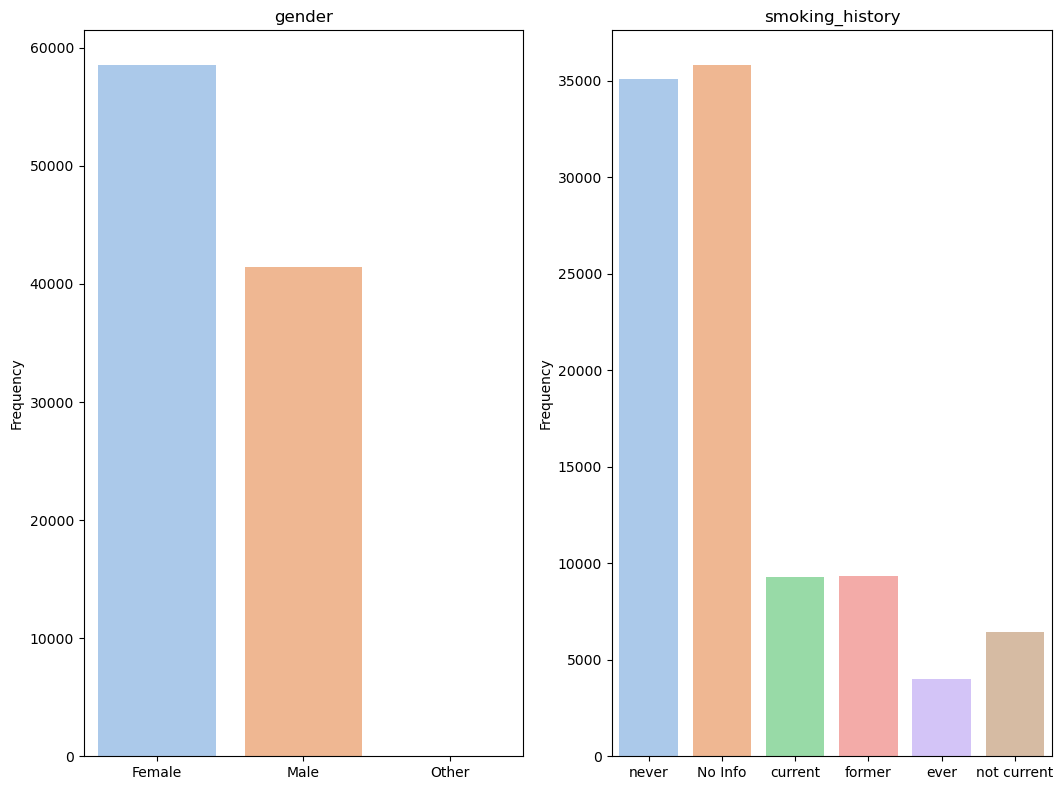

In [39]:
plt.figure(figsize=(16, 8))

# plot boxplots for categorical features (columns)
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)  # 3 plots in each row
    sns.countplot(x=dataframe[column], hue=dataframe[column], palette='pastel', legend=False)
    plt.title(column)
    plt.xlabel(None)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Gender**:
  - More females than males
  - No other
- **Smoking History**:  
  - Most are never or no info
  - Almost equal amounts of current and former
  - Least for ever, then second least is not current

<span style="color:#C361F8">*seaborn documention, HTML colour codes website, and Matplotlib documention (all in references) were referenced in this section*</span>

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

diabetes
0    91500
1     8500
Name: count, dtype: int64


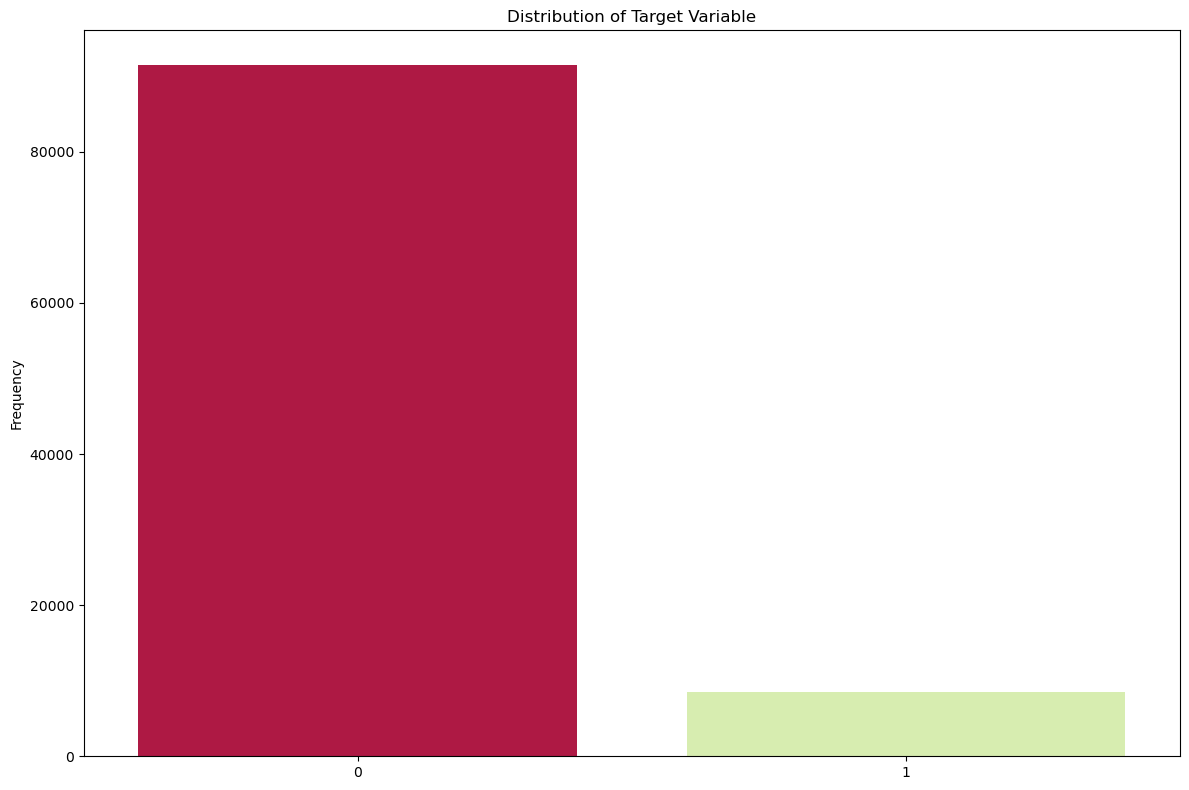

In [40]:
# count frequency of each class label 
class_distribution = dataframe[target_variable].value_counts()

print(class_distribution)

# bar plot for class frequencies
plt.figure(figsize=(12, 8))
sns.barplot(
    x=class_distribution.index,
    y=class_distribution.values,
    hue=class_distribution.index,
    palette=["#C70039", "#DAF7A6"],
    legend=False
)
plt.title('Distribution of Target Variable')
plt.xlabel(None)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


By looking at the bar plot, the dataset seems balanced. However, we can do another check. According to an article in the Medium referenced at the end of the notebook, if the minority class out of the classes is 10-20% of the data or less, then the dataset is imbalanced. So this check was also done to see if the dataset is balanced or imbalanced.

In [41]:
class_frequencies = {
    'No (0)': 91500,
    'Yes (1)': 8500,
}

# get percentage of frequencies of class
def class_percentage(class_count, total_count):
    return (class_count / total_count) * 100

total_instances = sum(class_frequencies.values())

In [42]:
# print percentage for each class
for class_label, class_count in class_frequencies.items():
    percentage = class_percentage(class_count, total_instances)
    print(f"{class_label}: {percentage}%")

No (0): 91.5%
Yes (1): 8.5%


The minority class is the Yes (1) class which is 8.5% of the data, which is less than the 10-20% threshold. Therefore, the data is unbalanced.

<span style="color:#C361F8">*seaborn documention, html colour codes website, and Medium article (all in references) were referenced in this section*</span>

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [43]:
X = dataframe.drop(columns='diabetes')
y = dataframe['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [44]:
categorical_columns = ['gender', 'smoking_history']

enc = preprocessing.OneHotEncoder(sparse_output=False)

X_train_encoded = enc.fit_transform(X_train[categorical_columns])
X_test_encoded = enc.transform(X_test[categorical_columns])

# convert one-hot encoded results to dataframe
X_train_enc_df = pd.DataFrame(X_train_encoded, columns=enc.get_feature_names_out(categorical_columns))
X_test_enc_df = pd.DataFrame(X_test_encoded, columns=enc.get_feature_names_out(categorical_columns))

# drop og categorical columns
X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)

# add one-hot encoded columns to original dataset
X_train = pd.concat([X_train, X_train_enc_df], axis=1)
X_test = pd.concat([X_test, X_test_enc_df], axis=1)

X_train.head(), X_test.head()

(    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
 0  73.0             0              0  24.77          3.5                   80   
 1  80.0             0              0  24.60          5.7                  145   
 2  38.0             0              0  24.33          4.0                  158   
 3  26.0             0              0  18.87          5.0                  100   
 4  61.0             1              0  22.11          4.5                   85   
 
    gender_Female  gender_Male  gender_Other  smoking_history_No Info  \
 0            0.0          1.0           0.0                      0.0   
 1            0.0          1.0           0.0                      0.0   
 2            1.0          0.0           0.0                      0.0   
 3            1.0          0.0           0.0                      0.0   
 4            1.0          0.0           0.0                      0.0   
 
    smoking_history_current  smoking_history_ever  smoking_history

One-Hot Encoding was the chosen method to encode the categorical variables which are gender and smoking_history. After researching online, this method was chosen because this encoding is suitable for these variables since they have no ordinal relationship. It avoids giving a false sense of order to the data. Also, each variable does not have too many categories so the binary vector digit length will not be too long. Overall, this encoding will allow these categorical variables to be used in models that need numerical input, such as Logistic Regression, KNN, and Decision Tree. 

<span style="color:#C361F8">*scikit-learn module (in references) and GeeksforGeeks (research) were referenced in this section*</span>

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [45]:
# initialize StandardScaler and fit on training data
scaler = preprocessing.StandardScaler().fit(X_train)

# transform both training and test data
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# convert scaled data back to dataframes 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

The technique used to standardize the numerical features is StandardScaler. StandardScaler transformes the data so that it has a mean of 0 and a standard deviation of 1. This ensures that the data is centered around 0 and each feature has unit variance. 

We chose StandardScaler to do the standardization transformation on the numerical features in the dataset for the following reasons:
- Logistic Regression and KNN models are sensitive to the scale of input features
    - According to scikitlearn, when the data is sparsed it is good to use StandardScaler
    - It ensures that all features contribute equally in the models and avoids biases in the model
        - Features with large ranged scales may influence the model's learning too heavily
    - Outliers will be considered properly in StandardScaler
    - There are different features with different units and ranges, so with standardization each feature will have a standard deviation of 1 and a mean of 0 which makes the scales uniform




<span style="color:#C361F8">*scikit-learn module (in references) was referenced in this section*</span>

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [46]:
# initializing models w/ default params
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000)

# training
dt.fit(X_train_scaled_df, y_train)
knn.fit(X_train_scaled_df, y_train)
lr.fit(X_train_scaled_df, y_train)

# predicting w/ the test set
dt_pred = dt.predict(X_test_scaled_df)
knn_pred = knn.predict(X_test_scaled_df)
lr_pred = lr.predict(X_test_scaled_df)

# printing accuracy 
print(f"Decision Tree accuracy: {accuracy_score(y_test, dt_pred)}")
print(f"KNN accuracy: {accuracy_score(y_test, knn_pred)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, lr_pred)}")

Decision Tree accuracy: 0.95315
KNN accuracy: 0.96055
Logistic Regression accuracy: 0.959


8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In cross-validation, the models were assessed, using 5 folds as seen in common practice to divide the data in 5 equal parts, to train on 4 parts and test/validate on the last one. This number of folds helps provide a balance between bias and variance, and contributes to efficiency.

<span style="color:#C361F8">*scikit-learn module (in references) was referenced in this section*</span>

In [47]:
# Cross Validation
models = {
    'Decision Tree': dt,
    'KNN': knn,
    'Logistic Regression': lr
}

res = {}

# assessing models
for name, model in models.items():
    f1 = cross_val_score(model, X_train_scaled_df, y_train, cv=5, scoring='f1')
    prec = cross_val_score(model, X_train_scaled_df, y_train, cv=5, scoring='precision')
    rec = cross_val_score(model, X_train_scaled_df, y_train, cv=5, scoring='recall')
    
    res[name] = {
        'F1 Score': f1.mean(),
        'Precision': prec.mean(),
        'Recall': rec.mean()
    }
    
    print(f"{name} F1 Score: {f1.mean()}")
    print(f"{name} Precision: {prec.mean()}")
    print(f"{name} Recall: {rec.mean()}")
    
resdf = pd.DataFrame(res)
    

Decision Tree F1 Score: 0.718013909297278
Decision Tree Precision: 0.7059017205510988
Decision Tree Recall: 0.7352767401309765
KNN F1 Score: 0.7216904413698342
KNN Precision: 0.8901083389612772
KNN Recall: 0.6070375752768052
Logistic Regression F1 Score: 0.7309617709273549
Logistic Regression Precision: 0.8691654594160039
Logistic Regression Recall: 0.6307421965167579


## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

## Hyperparameter Optimization

### Impact of varying values
#### DecisionTreeClassifier
- **Criterion**: This parameter determines the function used to measure the quality of a split. We tested both `gini` and `entropy`. The choice of criterion can impact the tree's structure and its ability to generalize. In our experiments, the `entropy` criterion often provided better performance by creating more informative splits.
- **Max Depth**: The parameter limits the depth of the tree. A tree deeper than 15 could capture more complex data, but could also increase the risk of overfitting of the data.

#### LogisticRegression
- **Penalty**: This parameter specifies the norm used in penalization. The l2 parameter shrinks coefficients so as to prevent overfitting of models.
- **Max Iterations**: This parameter controls the max number of iterations for the solver to converge.
- **Tolerance**: This parameter sets the tolerance for stopping criteria. 

#### KNeighborsClassifier
- **Number of Neighbors**: This parameter determines the number of neighbors to consider for classification. A smaller number can lead to a more sensitive model, while a larger number can smooth out noise but may miss finer patterns.
- **Weights**: The parameter specifies the weight function used in prediction. Using `distance` weights, where closer neighbors have a higher influence, improved the model's ability to handle varying densities in the data compared to `uniform` weights.


### Default Values for Hyperparamaters
#### DecisionTreeClassifier:
- **criterion**: `gini`
- **max_depth**: None

#### LogisticRegression:
- **penalty**: `l2`
- **max_iter**: 1000
- **tol**: 1e-4

#### KNeighborsClassifier:
- **n_neighbours**: 5
- **weights**: `uniform`

<span style="color:#C361F8">*scikit-learn module (in references) was referenced in this section*</span>

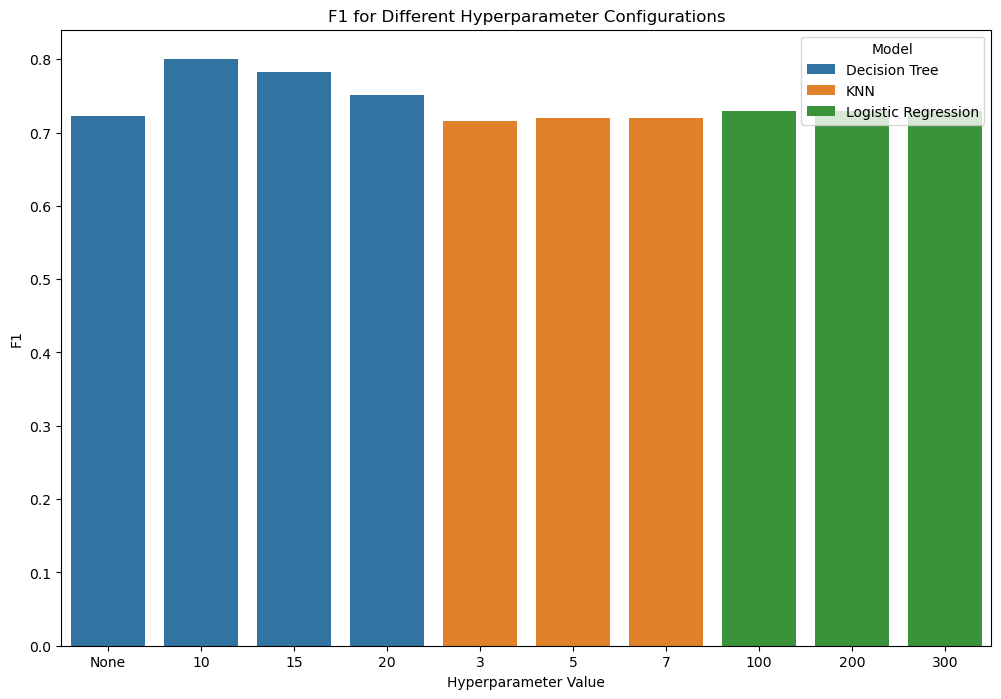

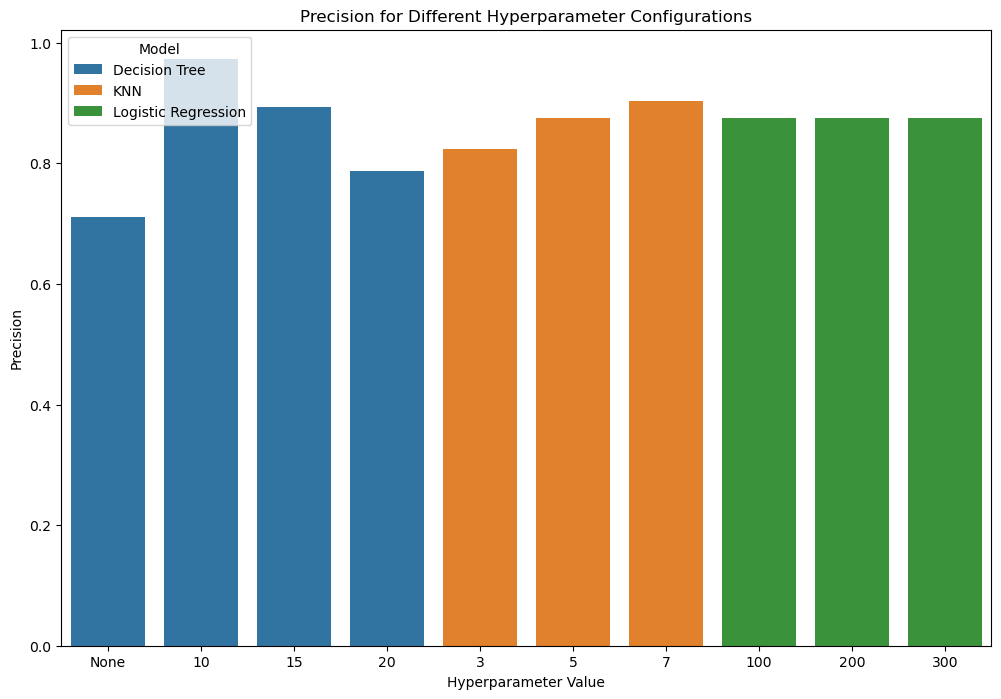

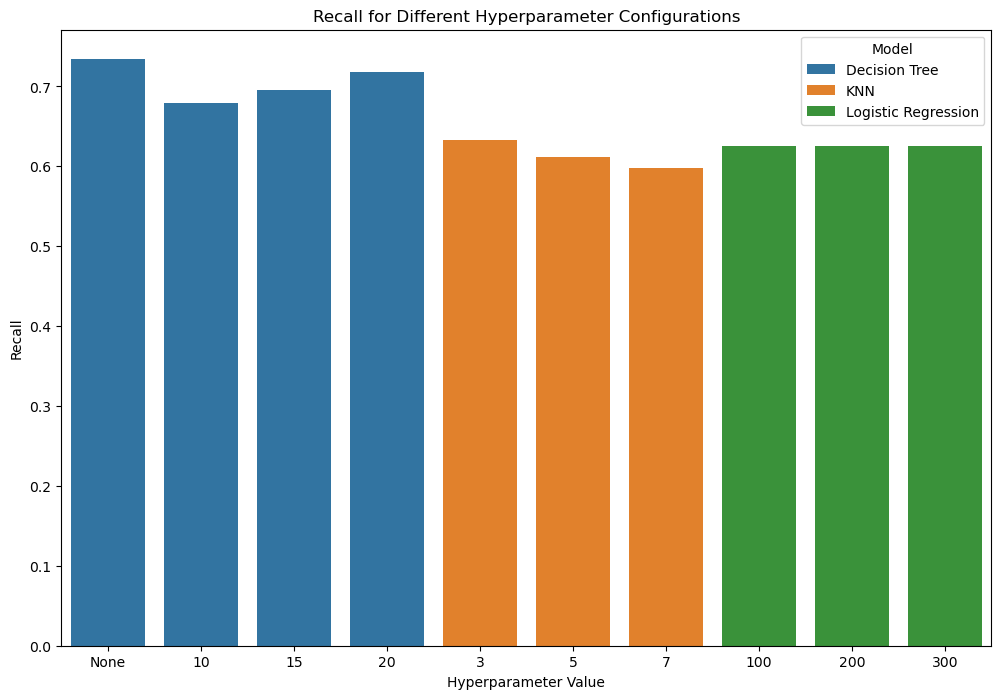

In [48]:
from sklearn.model_selection import GridSearchCV

# Parameter grids - we used a grid search strategy 
dtp = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20]
}

knnp = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

lrp = {
    'penalty': ['l2'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# scoring metrics
scoring = {
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}


# using grid searcg with the metrics
dt_grid = GridSearchCV(dt, dtp, cv=5, scoring=scoring, refit='f1')
knn_grid = GridSearchCV(knn, knnp, cv=5, scoring=scoring, refit='f1')
lr_grid = GridSearchCV(lr, lrp, cv=5, scoring=scoring, refit='f1')

dt_grid.fit(X_train_scaled_df, y_train)
knn_grid.fit(X_train_scaled_df, y_train)
lr_grid.fit(X_train_scaled_df, y_train)

# extracting grid results
dt_results = pd.DataFrame(dt_grid.cv_results_)
knn_results = pd.DataFrame(knn_grid.cv_results_)
lr_results = pd.DataFrame(lr_grid.cv_results_)

dt_results['Model'] = 'Decision Tree'
knn_results['Model'] = 'KNN'
lr_results['Model'] = 'Logistic Regression'

hyperparameters = {
    'Decision Tree': 'param_max_depth',
    'KNN': 'param_n_neighbors',
    'Logistic Regression': 'param_max_iter'
}

# metrics to plot
metrics = ['mean_test_f1', 'mean_test_precision', 'mean_test_recall']

# storing all possible configurations 
all_res = pd.concat([dt_results, knn_results, lr_results], ignore_index=True)

all_res['param_max_depth'] = all_res['param_max_depth'].astype(str)
all_res['param_n_neighbors'] = all_res['param_n_neighbors'].astype(str)
all_res['param_max_iter'] = all_res['param_max_iter'].astype(str)

# plotting the results
for metric in metrics:
    plt.figure(figsize=(12, 8))
    for model, param in hyperparameters.items():
        subset = all_res[all_res['Model'] == model]
        sns.barplot(
            x=subset[param],
            y=subset[metric],
            label=model,
            errorbar=None
        )
    plt.title(f'{metric.replace("mean_test_", "").capitalize()} for Different Hyperparameter Configurations')
    plt.xlabel('Hyperparameter Value')
    plt.ylabel(metric.replace("mean_test_", "").capitalize())
    plt.legend(title='Model')
    plt.show()

# to store precision recall and f1 scores for each model for q10
results = {}

# testing models w best params on the test set 
best = {
    'Decision Tree': dt_grid.best_estimator_,
    'KNN': knn_grid.best_estimator_,
    'Logistic Regression': lr_grid.best_estimator_
}

for name, model in best.items():
    y_pred = model.predict(X_test_scaled_df)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'F1 Score': f1,
        'Precision': prec,
        'Recall': rec
        
    }
    
results_df = pd.DataFrame(results)


### Analysis/ Insights
- For the decision tree, the entropy criterion with a max_depth of 15 gave us the best general performance.
- For logistic regression, increasing `max_iter` to 300 and setting the `tol` to 1e-3 improved convergence and performance.
- For knn, using distance weights with `n_neighbours` set to 7 gave the highest precision score, but the lowest f1 score and similar recall.

We also did add a comparison of the models, for before and after the parameter tuning


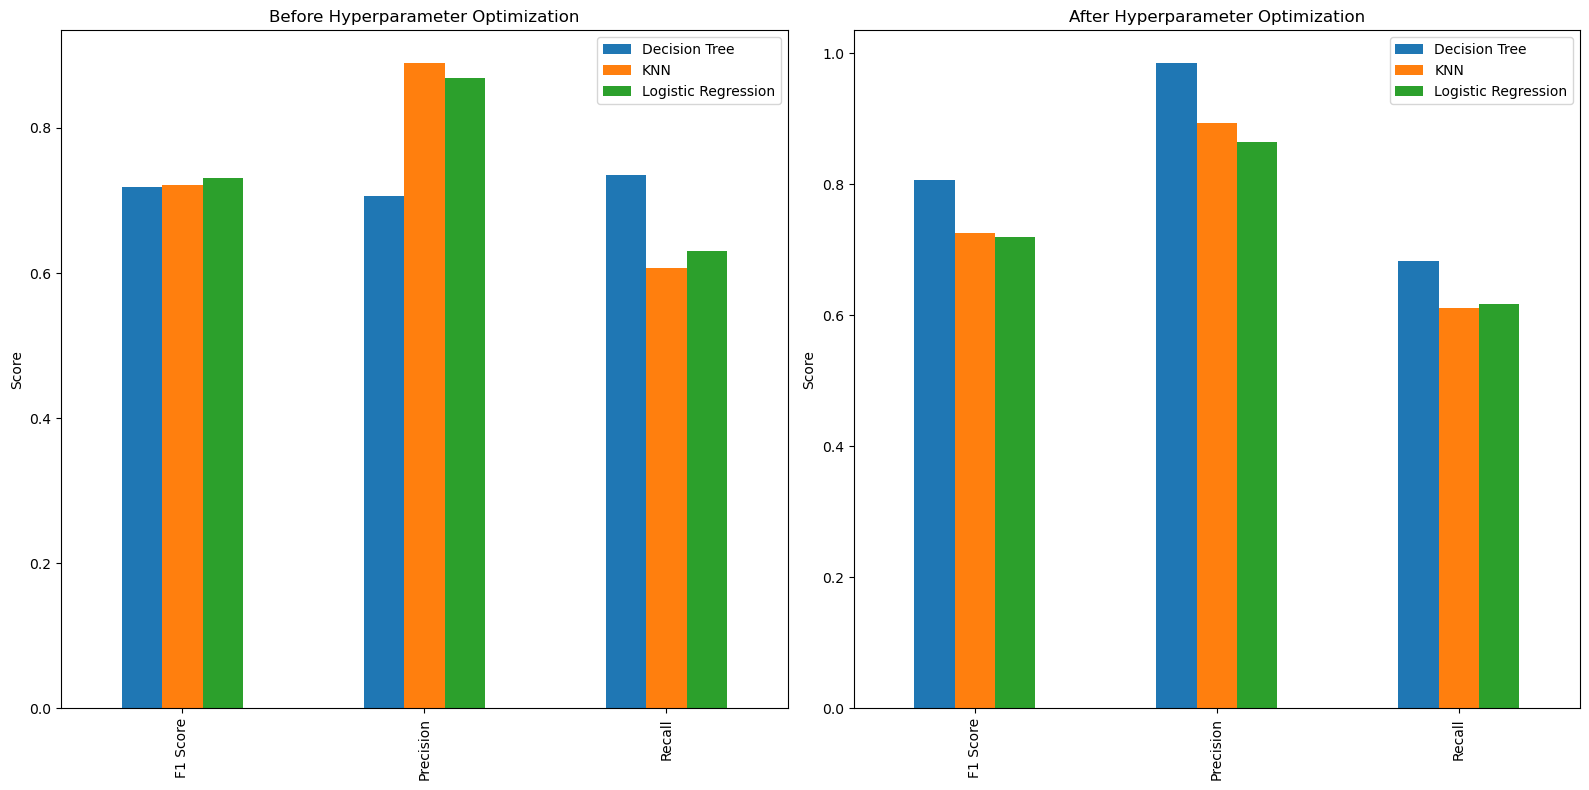

In [49]:
compare = pd.concat([resdf, results_df], keys=['Before','After'])

#plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

compare.loc['Before'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Before Hyperparameter Optimization')
axes[0].set_ylabel('Score')

compare.loc['After'].plot(kind='bar', ax=axes[1])
axes[1].set_title('After Hyperparameter Optimization')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()



## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

## **10**
**Results and Comparing**
- **Decision Tree**: Has highest precision, F-1 score and recall in comparison to the other models after hyperparameter tuning. It performs well in predicting positive cases when they actually occur and leaves out false positives, but misses some actual positive cases since the model is only prediciting a positive when it is very confident.

- **K-Nearest Neighbors (KNN)**: Precision and recall are more balanced but slightly lower than Decision Tree. It also has a good F1 score which means it has a balanced performance between precision and recall. However, it is slightly less than the Logistic Regression model in regards to recall.

- **Logistic Regression**: F1, Precision and Recall are all relatively close to KNN.

**Differences in Model Performance**
- **Model Complexity**
  - **Decision Tree**: 
    - Prone to overfitting, especially when the depth of the tree has no max
    - Parameter tuning helps to control overfitting by adjusting the `max_depth` 
  - **KNN**: 
    - Complexity depends on the number of neighbors used for classification
    - Lower number of neighbors can lead to overfitting
    - Higher number makes it more stable but may reduce sensitivity 
  - **Logistic Regression**: 
    - Simplest of the three models
    - Less prone to overfitting because of linear model which limits complexity

- **Data Imbalance**:
  - Data imbalance might have influenced the Decision Tree's recall score since it tends to favor the majority class
  - High precision but low recall means that it is not capturing some minority class instances 
  - KNN and Logistic Regression also suffer from data imbalance, but their performances are more balanced
    - Precision and Recall are more balanced

- **Impact of Parameter Tuning (as seen in before and after of bar plots)**:
  - **Decision Tree**: 
    - Improvement in its F1 score after tuning (highest F1 score)
    - Recall is lowered slightly, but precision is significantly higher
  - **KNN**:
    - Precision was lowered
    - Still struggled with sensitivity compared to Decision Tree, tuning did not significantly improve recall
  - **Logistic Regression**:
    - No significant changes with parameter tuning
    - Less complex and more resistant to overfitting

- **Model chosen**: Decision Tree
- **Reasoning**: The Decision Tree model has the highest F1 score, precision and recall when working on our test set. This model outperforms the other models by a landslide.

**Observations compared to cross-validation results**:
- Recall is almost the same
- F1 is slightly lower
- Precision is almost the same

Therefore, the model is not overfitting or underfitting. The small change in F1 score is potentially how well the model selects true positives vs not selecting false positives. Overall, the performance is mostly consistent.

- **Second Model chosen after DT results**: Logistic regression
- **Reasoning**: Less complex so it will be more resistant to overfitting, values are also balanced after parameter tuning

In [50]:
# train Logistic Regression with best parameters
best_lr = lr_grid.best_estimator_
best_lr.fit(X_train_scaled_df, y_train)

# trained model applied to test data
y_pred_lr = best_lr.predict(X_test_scaled_df)

prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression on Test Set:")
print(f"Precision: {prec_lr}")
print(f"Recall: {rec_lr}")
print(f"F1 Score: {f1_lr}")

Logistic Regression on Test Set:
Precision: 0.8639344262295082
Recall: 0.617096018735363
F1 Score: 0.7199453551912568


**Observations compared to cross-validation results**:
All scores are consistent, therefore the model is very consistent.

# Resources

> A list of pandas readcsv encoding options. Saturn Cloud Blog. (2023, November 7). https://saturncloud.io/bloga-list-of-pandas-readcsv-encoding-options/ 
>
> GeeksforGeeks. (2024, March 21), *One hot encoding in machine learning*. https://www.geeksforgeeks.org/ml-one-hot-encoding/
>
> HTML Color Codes. (2015, September 3). *HTML color codes*. https://htmlcolorcodes.com/  
>
> Matplotlib 3.9.2 documentation. (n.d.). *Creating multiple subplots using plt.subplots*. https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html  
>  
> seaborn 0.13.2 documentation. (n.d.). *Seaborn.barplot*. https://seaborn.pydata.org/generated/seaborn.barplot.html  
>  
> seaborn 0.13.2 documentation. (n.d.). *Seaborn.boxplot*. https://seaborn.pydata.org/generated/seaborn.boxplot.html  
>  
> seaborn 0.13.2 documentation. (n.d.). *Seaborn.histplot*. https://seaborn.pydata.org/generated/seaborn.histplot.html  
>  
> Siddiqi, F. (2024, April 6). *How can I determine if my data is balanced or imbalanced?*. Medium. https://medium.com/@faheemsiddiqi789/how-can-i-determine-if-my-data-is-balanced-or-imbalanced-080819af408c  
>
> *Content on ______ is from material presented in the course.*
> https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide
>
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
>
> https://scikit-learn.org/stable/modules/cross_validation.html
>
> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
>
> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
>
> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
